# Open Pose 사용 코드 템플릿

https://github.com/ForgottenOneNyx/Open-Pose-Keras 의 코드를 사용하여 포즈를 추출한다.

프로젝트 내의 demo.ipynb를 기반으로 하였다.

# 프로젝트 다운로드

In [32]:
!git clone https://github.com/dhrim/Open-Pose-Keras

Cloning into 'Open-Pose-Keras'...
remote: Enumerating objects: 418, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 418 (delta 11), reused 21 (delta 11), pack-reused 397
Receiving objects: 100% (418/418), 29.70 MiB | 40.01 MiB/s, done.
Resolving deltas: 100% (236/236), done.


In [33]:
%cd Open-Pose-Keras

/content/Open-Pose-Keras/Open-Pose-Keras


# 필요한 라이브러리 설치

In [34]:
!pip install configobj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 대상 이미지 준비

In [16]:
!cp /content/drive/MyDrive/tmp/Desktop.zip ./ # tmp밑에 필요한 zip파일을 올려야함

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!ls -al

total 4083964
drwxr-xr-x 13 root root       4096 Aug 23 07:01 .
drwxr-xr-x  1 root root       4096 Aug 23 06:44 ..
drwxr-xr-x  2 root root       4096 Aug 23 06:44 addins
-rw-r--r--  1 root root        765 Aug 23 06:44 config
-rwxr-xr-x  1 root root       6483 Aug 23 06:44 config.py
-rw-r--r--  1 root root       1226 Aug 23 06:44 config_reader_colab.py
-rw-r--r--  1 root root       1195 Aug 23 06:44 config_reader.py
drwxr-xr-x  3 root root       4096 Aug 23 06:44 dataset
-rw-r--r--  1 root root          6 Aug 23 06:44 demo_camera.py
-rw-r--r--  1 root root      11426 Aug 23 06:44 demo_image.py
-rw-r--r--  1 root root    9937205 Aug 23 06:44 demo.ipynb
-rw-r--r--  1 root root      19541 Aug 23 06:44 demo_video.py
-rw-------  1 root root   44399224 Aug 23 07:01 Desktop.zip
drwxr-xr-x  8 root root       4096 Aug 23 06:44 .git
-rw-r--r--  1 root root        274 Aug 23 06:44 .gitignore
-rw-r--r--  1 root root         88 Aug 23 06:44 .gitmodules
-rw-r--r--  1 root root       6755 Aug 23 06:44

In [18]:
# 여기서 파일 드래그로 올려주기
!rm -rf obj
!mkdir obj
!unzip Desktop.zip -d obj/


Archive:  Desktop.zip
   creating: obj/test/
   creating: obj/test/bad/
  inflating: obj/test/bad/110.jpg    
  inflating: obj/test/bad/111.jpg    
  inflating: obj/test/bad/112.jpg    
  inflating: obj/test/bad/113.jpg    
  inflating: obj/test/bad/114.jpg    
  inflating: obj/test/bad/115.jpg    
  inflating: obj/test/bad/116.jpg    
  inflating: obj/test/bad/117.jpg    
  inflating: obj/test/bad/118.jpg    
  inflating: obj/test/bad/119.jpg    
  inflating: obj/test/bad/120.jpg    
  inflating: obj/test/bad/121.jpg    
  inflating: obj/test/bad/122.jpg    
  inflating: obj/test/bad/123.jpg    
  inflating: obj/test/bad/124.jpg    
  inflating: obj/test/bad/125.jpg    
  inflating: obj/test/bad/126.jpg    
  inflating: obj/test/bad/127.jpg    
  inflating: obj/test/bad/128.jpg    
  inflating: obj/test/bad/129.jpg    
  inflating: obj/test/bad/130.jpg    
  inflating: obj/test/bad/131.jpg    
  inflating: obj/test/bad/132.jpg    
  inflating: obj/test/bad/133.jpg    
  inflating: obj

In [31]:
!cp /gdrive/MyDrive/DATA/SIT.zip ./ 
!cp /gdrive/MyDrive/DATA/STAND.zip ./

cp: cannot stat '/gdrive/MyDrive/DATA/SIT.zip': No such file or directory
cp: cannot stat '/gdrive/MyDrive/DATA/STAND.zip': No such file or directory


In [ ]:
# !ls -al *.jpg

-rw------- 1 root root  35537 Aug 18 08:19 0.jpg
-rw------- 1 root root 150520 Aug 18 08:19 100.jpg
-rw------- 1 root root 150875 Aug 18 08:19 101.jpg
-rw------- 1 root root 150513 Aug 18 08:19 102.jpg
-rw------- 1 root root 150538 Aug 18 08:19 103.jpg
-rw------- 1 root root 150233 Aug 18 08:19 104.jpg
-rw------- 1 root root 150444 Aug 18 08:19 105.jpg
-rw------- 1 root root 150259 Aug 18 08:19 106.jpg
-rw------- 1 root root 150570 Aug 18 08:19 107.jpg
-rw------- 1 root root 150345 Aug 18 08:19 108.jpg
-rw------- 1 root root 150002 Aug 18 08:19 109.jpg
-rw------- 1 root root 152434 Aug 18 08:19 10.jpg
-rw------- 1 root root 149314 Aug 18 08:19 110.jpg
-rw------- 1 root root 149025 Aug 18 08:19 111.jpg
-rw------- 1 root root 148907 Aug 18 08:19 112.jpg
-rw------- 1 root root 148893 Aug 18 08:19 113.jpg
-rw------- 1 root root 149154 Aug 18 08:19 114.jpg
-rw------- 1 root root 149653 Aug 18 08:19 115.jpg
-rw------- 1 root root 149552 Aug 18 08:19 116.jpg
-rw------- 1 root root 149978 Aug 

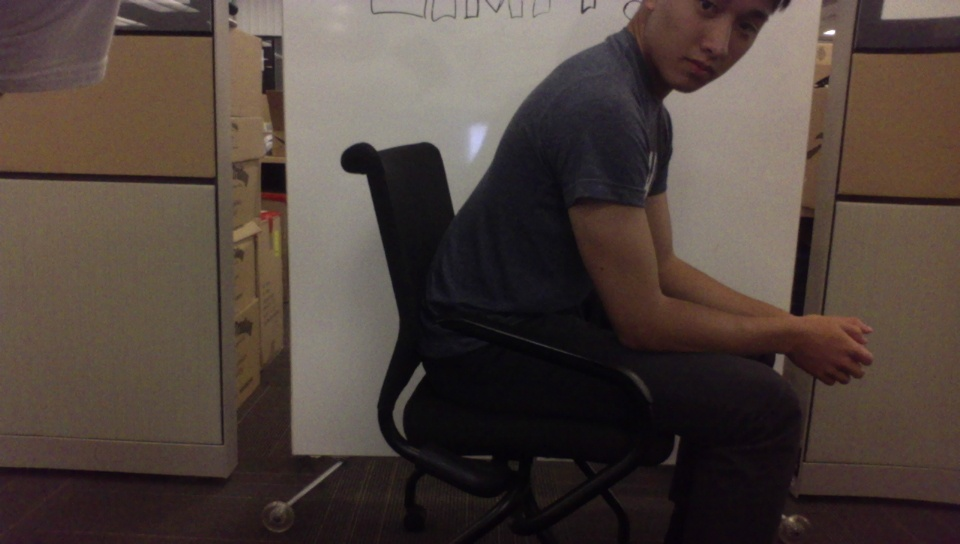

In [19]:
from IPython.display import Image, display
display(Image('obj/train/bad/1.jpg'))
# file_name = "128.jpg"

# 모델 로딩

In [20]:
from open_pose_wrapper import OpenPoseWrapper
model = OpenPoseWrapper()

Downloading...
From: https://drive.google.com/uc?id=1d9HGnnLhq6IhC5ZSVpBf7bSrpjNj5kPB
To: /content/Open-Pose-Keras/open_pose_model.h5
100%|██████████| 210M/210M [00:07<00:00, 29.9MB/s]


In [21]:
!pip install tensorflow==2.7.0 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 23.6 MB/s 
     |████████████████████████████████| 463 kB 62.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

# 포즈 추출 실행

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7f7ce03d7b90>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Unknown node type <gast.gast.Expr object at 0x7f7ce03d7b90>
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


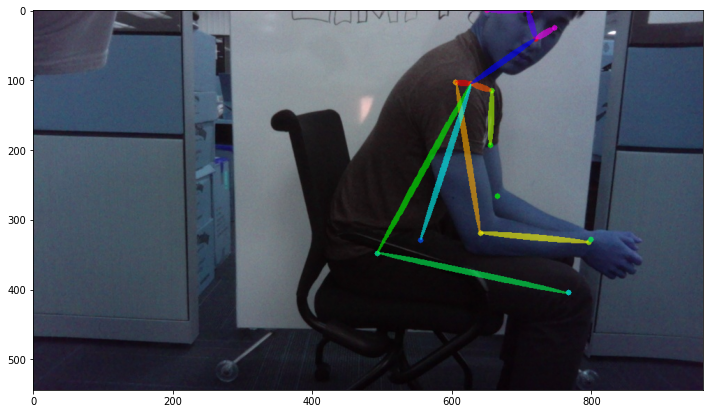

In [22]:
file_name = "obj/train/bad/1.jpg"
all_peaks, subset, candidate = model.extract(file_name)
model.draw_result(file_name, all_peaks, subset, candidate, draw_dot=True, draw_line=True)

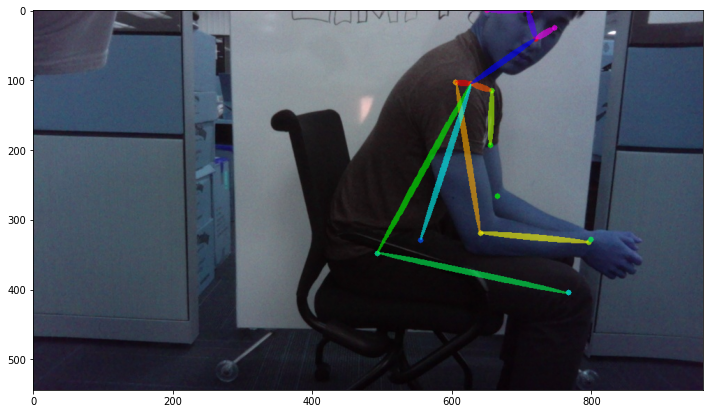

In [23]:
model.extract_and_draw(file_name)

In [24]:
# copy from https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e

from IPython.display import clear_output
from tensorflow.keras.callbacks import Callback



class PlotLosses(Callback):

  def on_train_begin(self, logs={}):
    self.epochs = []
    self.losses = []
    self.val_losses = []
    self.logs = []
    self.fig = plt.figure()

    


  def on_epoch_end(self, epoch, logs={}):

    self.epochs.append(epoch)
    self.losses.append(logs.get('loss'))
    self.val_losses.append(logs.get('val_loss'))

    clear_output(wait=True)
    plt.plot(self.epochs, self.losses, label="loss")
    plt.plot(self.epochs, self.val_losses, label="val_loss")
    plt.legend()
    plt.show();
    print("loss = ", self.losses[-1], ", val_loss = ", self.val_losses[-1])

In [35]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # 모니터링 대상
    patience=25,        # 대상 기간동안 유지
    factor=0.2,         # 줄이는 양  
    verbose=1,                            
    min_learning_rate=0.00001)     # 최소 학습율


model = keras.Sequential()
model.add(Input((224,224,3)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(Conv2D(256, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(Conv2D(512, (3,3), padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()

log_dir = "./logs"

from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir=log_dir)

def normalize(image):
  return image/255.0

preprocessor = normalize
BATCH_SIZE = 64

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor
).flow_from_directory(
      "obj/train",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

test_data_generator = ImageDataGenerator(
      preprocessing_function=preprocessor
).flow_from_directory(
      "obj/test",
      target_size=(224,224),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

from tensorflow.keras.callbacks import ModelCheckpoint
model_check_point = ModelCheckpoint(
    'best_model.h5', 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True) # 얘가 로스가 최고로 좋을때만 저장해주겠다

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  # 모니터링 대상
    verbose=1,
    patience=50)         # 중지까지의 여유분



from tensorflow.keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir=log_dir)


model_check_point = ModelCheckpoint('best_model.h5', monitor='val_loss',  save_best_only=True)
plot_losses = PlotLosses()
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_learning_rate=0.001)
log_dir = "./logs"
tensorboard = TensorBoard(log_dir=log_dir)

callbacks = [model_check_point, plot_losses, early_stopping, reduce_lr, tensorboard]

history = model.fit(
      train_data_generator,
      validation_data=test_data_generator,
      steps_per_epoch=train_data_generator.samples/BATCH_SIZE,  
      validation_steps=test_data_generator.samples/BATCH_SIZE,      
      epochs=10,
      #callbacks=[plot_losses]
      callbacks=[reduce_lr]
)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


loss, acc = model.evaluate(
      test_data_generator,
      steps=test_data_generator.samples/BATCH_SIZE
)
print("loss=", loss)
print("acc=", acc)



test_x, test_y = next(iter(test_data_generator))
y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, '.')
# plt.plot(predicted[:100], '.')
plt.show()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_27 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_29 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                 

FileNotFoundError: ignored

# 추출 결과 해석

all_peak와 subset에 그 결과가 담긴다.

- all_peaks : 추출된 모든 포인트의 정보
- subset : 사람 별로 추출된 포인트의 정보

18개 부위를 추출한다.

각 부위의 이름은 config.py에 정의되어 있다.

```
part_str = [nose, neck, Rsho, Relb, Rwri, Lsho, Lelb, Lwri, Rhip, Rkne, Rank, Lhip, Lkne, Lank, Leye, Reye, Lear, Rear, pt19]
```

## all_peaks

추출된 점이 담긴 all_peaks는 18개의 요소가 있는 리스트이다.

In [ ]:
print(len(all_peaks))

18


In [ ]:
import config_reader

_, model_params = config_reader.config_reader()
part_str = model_params['part_str']
for i in range(18):
  print(part_str[i], ": ", all_peaks[i])

[nose :  [(177, 6, 0.11634589754976332, 0), (484, 130, 0.7376980632543564, 1), (287, 154, 0.9168480336666107, 2), (410, 221, 0.9359187334775925, 3)]
neck :  [(159, 3, 0.15268703586116317, 4), (463, 174, 0.6495651006698608, 5), (464, 175, 0.6481997482478619, 6), (269, 196, 0.8361002951860428, 7), (180, 233, 0.1334130592586007, 8), (365, 259, 0.8730711340904236, 9)]
Rsho :  [(134, 3, 0.1353807461255201, 10), (419, 160, 0.5524024441838264, 11), (224, 183, 0.6817547976970673, 12), (176, 219, 0.20693256426602602, 13), (327, 243, 0.7500506788492203, 14)]
Relb :  [(161, 147, 0.4612096697092056, 15), (115, 195, 0.6741257607936859, 16), (406, 197, 0.1711168922483921, 17), (260, 255, 0.5720155611634254, 18)]
Rwri :  [(305, 62, 0.17255903780460358, 19), (102, 74, 0.6579355448484421, 20), (467, 159, 0.5370955336838961, 21), (59, 160, 0.7744936645030975, 22), (214, 262, 0.767869308590889, 23)]
Lsho :  [(187, 5, 0.11818064154067542, 24), (508, 187, 0.5617953725159168, 25), (311, 208, 0.6824823915958

all_peaks[0]은 추출된 nose의 포인트가 담겨 있다.

In [ ]:
for i in range(len(all_peaks[0])):
  print(all_peaks[0][i])


1개의 point는 다음과 같이 구성된다.
```
(484, 130, 0.7376982569694519, 1)
  x    y   score               point_id
```

## subset

subset 각 요소는 사람 1명에 대한 추출 결과이다.

In [ ]:
print(len(subset))

1개의 subset 요소는 1사람에 대한 19개 포인트 id로 구성되어 있다.

In [ ]:
print(subset[0])


point_id는 all_peaks에 명시되어 있다.
```
all_peaks의 내용

(177, 6, 0.11634597013471648, 0)
(484, 130, 0.7376982569694519, 1)
(287, 154, 0.9168482273817062, 2)
(410, 221, 0.9359188675880432, 3)

각 줄의 마지막 숫가가 point_id이다.

```

각 포인트별 연결 가능 여부는 limSeq에 담겨 있다.

In [ ]:
from open_pose_wrapper import limbSeq

print(len(limbSeq))
print(limbSeq)

19
[[2, 3], [2, 6], [3, 4], [4, 5], [6, 7], [7, 8], [2, 9], [9, 10], [10, 11], [2, 12], [12, 13], [13, 14], [2, 1], [1, 15], [15, 17], [1, 16], [16, 18], [3, 17], [6, 18]]


[2, 3] 은 neck과 Rsho(righst shoulder)가 연결되어 있음을 의미하고, 

[3,4]는 Rsho(righst shoulder)와 Relb(right elbow)가 이어져 있다는 것을 의미한다.

```
1: nose
2: neck
3: Rsho
4: Relb
5: Rwri
...
```
